In [3]:
import pandas as pd
import numpy as np

In [5]:
df1=pd.read_csv("../CSVs/df_final_with_laketypesorted_pre.csv")
df1

,Lake_type,Longitude,Latitude,Year_final,Lake_area_ha,Elevation_m,GLOF,Lake_type_simplified,is_supraglacial
0,water pocket,74.609,42.522,1984,NaN,3466,1,other,0
1,ice,79.846,42.207,1984,NaN,3269,1,ice,0
2,ice,77.193,35.677,1984,NaN,4779,1,ice,0
3,water pocket,83.967,29.307,1985,NaN,4594,1,other,0
4,water pocket,74.633,36.039,1985,NaN,3301,1,other,0
...,...,...,...,...,...,...,...,...,...
2647,E(c),97.131,27.948,2019,11.08,3819,0,other,0
2648,E(o),97.316,27.994,2019,13.95,4270,0,other,0
2649,E(o),97.369,27.989,2019,51.93,4188,0,other,0
2650,E(o),97.358,27.893,2019,21.52,3931,0,other,0


In [6]:
df2=pd.read_csv("../CSVs/uncleaned_ml_combined.csv")
df2

,Longitude,Latitude,Year_final,Lake_area_calculated_ha,Elevation_m,Lake_type_simplified,is_supraglacial,glacier_area_ha,slope_glac_to_lake,glacier_contact,glacier_touch_count,nearest_glacier_dist_m,glacier_elev_m,5y_expansion_rate,10y_expansion_rate,GLOF
0,74.609,42.522,1984,NaN,3466,other,0,536.125805,0.000000,1,2,0.000000,3985.0,NaN,NaN,1
1,79.846,42.207,1984,NaN,3269,ice,0,396.118156,2.959854,0,0,446.305779,4590.0,NaN,NaN,1
2,77.193,35.677,1984,NaN,4779,ice,0,9444.515664,0.718550,0,0,1036.810675,5524.0,NaN,NaN,1
3,83.967,29.307,1985,NaN,4594,other,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,1
4,74.633,36.039,1985,NaN,3301,other,0,6998.712273,0.000000,1,3,0.000000,4575.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,97.131,27.948,2019,8.804308,3819,other,0,NaN,NaN,0,0,NaN,NaN,-0.650407,NaN,0
2648,97.316,27.994,2019,5.550490,4270,other,0,1.836153,0.077706,0,0,4890.214341,4650.0,0.681917,0.919823,0
2649,97.369,27.989,2019,8.643035,4188,other,0,NaN,NaN,0,0,NaN,NaN,-5.661737,1.411411,0
2650,97.358,27.893,2019,21.590730,3931,other,0,NaN,NaN,0,0,NaN,NaN,0.111127,4.016512,0


Correlation (r): 0.671
R²: 0.326
RMSE: 67.71 ha


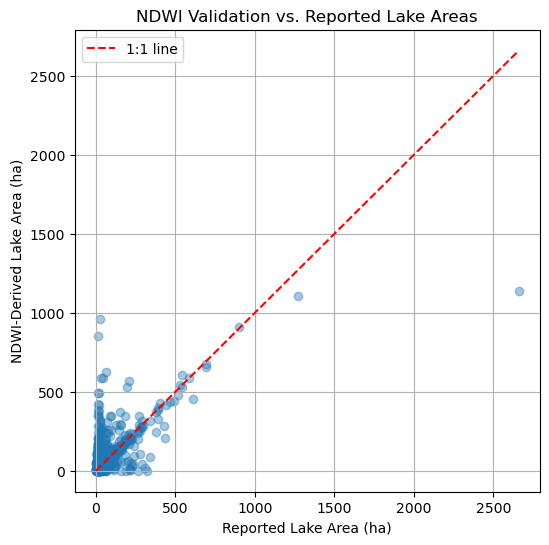

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

mask = (~df1["Lake_area_ha"].isna()) & (~df2["Lake_area_calculated_ha"].isna())
true_area = df1.loc[mask, "Lake_area_ha"]
calc_area = df2.loc[mask, "Lake_area_calculated_ha"]

# Metrics
corr = np.corrcoef(true_area, calc_area)[0,1]
r2 = r2_score(true_area, calc_area)
rmse = np.sqrt(mean_squared_error(true_area, calc_area))

print(f"Correlation (r): {corr:.3f}")
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f} ha")

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(true_area, calc_area, alpha=0.4)
plt.plot([0, max(true_area.max(), calc_area.max())],
         [0, max(true_area.max(), calc_area.max())],
         'r--', label="1:1 line")
plt.xlabel("Reported Lake Area (ha)")
plt.ylabel("NDWI-Derived Lake Area (ha)")
plt.title("NDWI Validation vs. Reported Lake Areas")
plt.legend()
plt.grid(True)
plt.show()
